In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
# seed 값 설정
np.random.seed(3)
tf.random.set_seed(3)

In [3]:
df_pre = pd.read_csv('dataset/wine_train.csv', header=None)

print(df_pre.shape)
df_pre.head()

(5000, 13)


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.1,0.21,0.28,2.7,0.034,23.0,111.0,0.99405,3.35,0.64,10.2,4,0
1,6.5,0.22,0.29,7.4,0.028,16.0,87.0,0.99311,3.15,0.56,10.9,7,0
2,6.8,0.29,0.49,1.4,0.142,52.0,148.0,0.99370,3.08,0.49,9.0,6,0
3,7.4,0.24,0.40,4.3,0.032,9.0,95.0,0.99200,3.09,0.39,11.1,6,0
4,6.8,0.19,0.23,5.1,0.034,71.0,204.0,0.99420,3.23,0.69,10.1,5,0


In [4]:
dataset = df_pre.values
X = dataset[:,0:12]
Y = dataset[:,12]

In [5]:
# 모델의 설정
model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일(컴퓨터에게 모델 학습 조건을 알려줌)
model.compile(loss='binary_crossentropy',  # 오차 함수
          optimizer='adam',                # optimizer
          metrics=['accuracy'])            # 평가 지표

In [6]:
# 모델 저장폴더 설정
MODEL_DIR = './model/'

if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [7]:
# 모델 저장조건 설정
modelpath = "./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, 
                               monitor='val_loss', 
                               verbose=1, 
                               save_best_only=True)

In [8]:
#pip install h5py

In [9]:
%%time
# 모델 학습 및 학습 진행상황 저장
history = model.fit(X, Y, 
                     validation_split=0.33, 
                     epochs=1000, 
                     batch_size=500, 
                     callbacks=[checkpointer])


Epoch 1/1000
1/7 [===>..........................] - ETA: 4s - loss: 10.2703 - accuracy: 0.2920
Epoch 1: val_loss improved from inf to 7.29212, saving model to ./model/01-7.2921.hdf5
7/7 [==============================] - 1s 37ms/step - loss: 9.2672 - accuracy: 0.2457 - val_loss: 7.2921 - val_accuracy: 0.2417
Epoch 2/1000
1/7 [===>..........................] - ETA: 0s - loss: 7.1499 - accuracy: 0.2520
Epoch 2: val_loss improved from 7.29212 to 4.25368, saving model to ./model/02-4.2537.hdf5
7/7 [==============================] - 0s 15ms/step - loss: 5.8821 - accuracy: 0.2395 - val_loss: 4.2537 - val_accuracy: 0.2047
Epoch 3/1000
1/7 [===>..........................] - ETA: 0s - loss: 4.3782 - accuracy: 0.1880
Epoch 3: val_loss improved from 4.25368 to 2.01426, saving model to ./model/03-2.0143.hdf5
7/7 [==============================] - 0s 13ms/step - loss: 3.1604 - accuracy: 0.2096 - val_loss: 2.0143 - val_accuracy: 0.2774
Epoch 4/1000
1/7 [===>..........................] - ETA: 0s - lo

Epoch 54/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.1314 - accuracy: 0.9520
Epoch 54: val_loss improved from 0.17623 to 0.17533, saving model to ./model/54-0.1753.hdf5
7/7 [==============================] - 0s 9ms/step - loss: 0.1762 - accuracy: 0.9391 - val_loss: 0.1753 - val_accuracy: 0.9394
Epoch 55/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.1909 - accuracy: 0.9440
Epoch 55: val_loss improved from 0.17533 to 0.17478, saving model to ./model/55-0.1748.hdf5
7/7 [==============================] - 0s 19ms/step - loss: 0.1758 - accuracy: 0.9397 - val_loss: 0.1748 - val_accuracy: 0.9400
Epoch 56/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.2259 - accuracy: 0.9140
Epoch 56: val_loss improved from 0.17478 to 0.17437, saving model to ./model/56-0.1744.hdf5
7/7 [==============================] - 0s 14ms/step - loss: 0.1756 - accuracy: 0.9397 - val_loss: 0.1744 - val_accuracy: 0.9400
Epoch 57/1000
1/7 [===>..........................] - ETA

7/7 [==============================] - 0s 15ms/step - loss: 0.1597 - accuracy: 0.9439 - val_loss: 0.1588 - val_accuracy: 0.9437
Epoch 81/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.1614 - accuracy: 0.9360
Epoch 81: val_loss improved from 0.15881 to 0.15761, saving model to ./model/81-0.1576.hdf5
7/7 [==============================] - 0s 15ms/step - loss: 0.1587 - accuracy: 0.9451 - val_loss: 0.1576 - val_accuracy: 0.9431
Epoch 82/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.1441 - accuracy: 0.9540
Epoch 82: val_loss improved from 0.15761 to 0.15759, saving model to ./model/82-0.1576.hdf5
7/7 [==============================] - 0s 15ms/step - loss: 0.1613 - accuracy: 0.9436 - val_loss: 0.1576 - val_accuracy: 0.9443
Epoch 83/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.1424 - accuracy: 0.9540
Epoch 83: val_loss improved from 0.15759 to 0.15742, saving model to ./model/83-0.1574.hdf5
7/7 [==============================] - 0s 15ms/step - l

7/7 [==============================] - 0s 10ms/step - loss: 0.1422 - accuracy: 0.9492 - val_loss: 0.1396 - val_accuracy: 0.9534
Epoch 108/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.1425 - accuracy: 0.9460
Epoch 108: val_loss did not improve from 0.13962
7/7 [==============================] - 0s 6ms/step - loss: 0.1418 - accuracy: 0.9516 - val_loss: 0.1404 - val_accuracy: 0.9503
Epoch 109/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.1450 - accuracy: 0.9480
Epoch 109: val_loss improved from 0.13962 to 0.13844, saving model to ./model/109-0.1384.hdf5
7/7 [==============================] - 0s 10ms/step - loss: 0.1408 - accuracy: 0.9492 - val_loss: 0.1384 - val_accuracy: 0.9540
Epoch 110/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.1212 - accuracy: 0.9620
Epoch 110: val_loss improved from 0.13844 to 0.13828, saving model to ./model/110-0.1383.hdf5
7/7 [==============================] - 0s 19ms/step - loss: 0.1387 - accuracy: 0.9534 - val_

7/7 [==============================] - 0s 9ms/step - loss: 0.1228 - accuracy: 0.9555 - val_loss: 0.1216 - val_accuracy: 0.9564
Epoch 135/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.1289 - accuracy: 0.9560
Epoch 135: val_loss did not improve from 0.12156
7/7 [==============================] - 0s 7ms/step - loss: 0.1224 - accuracy: 0.9564 - val_loss: 0.1231 - val_accuracy: 0.9552
Epoch 136/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.1004 - accuracy: 0.9540
Epoch 136: val_loss improved from 0.12156 to 0.12011, saving model to ./model/136-0.1201.hdf5
7/7 [==============================] - 0s 21ms/step - loss: 0.1213 - accuracy: 0.9558 - val_loss: 0.1201 - val_accuracy: 0.9570
Epoch 137/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.1182 - accuracy: 0.9560
Epoch 137: val_loss improved from 0.12011 to 0.12010, saving model to ./model/137-0.1201.hdf5
7/7 [==============================] - 0s 10ms/step - loss: 0.1202 - accuracy: 0.9567 - val_l

Epoch 190/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.0751 - accuracy: 0.9740
Epoch 190: val_loss did not improve from 0.09248
7/7 [==============================] - 0s 7ms/step - loss: 0.0970 - accuracy: 0.9648 - val_loss: 0.0961 - val_accuracy: 0.9721
Epoch 191/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.0812 - accuracy: 0.9760
Epoch 191: val_loss did not improve from 0.09248
7/7 [==============================] - 0s 7ms/step - loss: 0.0996 - accuracy: 0.9698 - val_loss: 0.0984 - val_accuracy: 0.9624
Epoch 192/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.0904 - accuracy: 0.9600
Epoch 192: val_loss improved from 0.09248 to 0.09162, saving model to ./model/192-0.0916.hdf5
7/7 [==============================] - 0s 12ms/step - loss: 0.0967 - accuracy: 0.9698 - val_loss: 0.0916 - val_accuracy: 0.9721
Epoch 193/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.0999 - accuracy: 0.9660
Epoch 193: val_loss improved from 0.09162 

Epoch 218/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.0541 - accuracy: 0.9820
Epoch 218: val_loss improved from 0.08168 to 0.08118, saving model to ./model/218-0.0812.hdf5
7/7 [==============================] - 0s 15ms/step - loss: 0.0861 - accuracy: 0.9719 - val_loss: 0.0812 - val_accuracy: 0.9758
Epoch 219/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.0803 - accuracy: 0.9700
Epoch 219: val_loss did not improve from 0.08118
7/7 [==============================] - 0s 6ms/step - loss: 0.0850 - accuracy: 0.9710 - val_loss: 0.0814 - val_accuracy: 0.9733
Epoch 220/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.0808 - accuracy: 0.9680
Epoch 220: val_loss improved from 0.08118 to 0.08113, saving model to ./model/220-0.0811.hdf5
7/7 [==============================] - 0s 11ms/step - loss: 0.0847 - accuracy: 0.9743 - val_loss: 0.0811 - val_accuracy: 0.9764
Epoch 221/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.0683 - accuracy: 0.9

7/7 [==============================] - 0s 7ms/step - loss: 0.0778 - accuracy: 0.9776 - val_loss: 0.0725 - val_accuracy: 0.9758
Epoch 246/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.0968 - accuracy: 0.9660
Epoch 246: val_loss did not improve from 0.07231
7/7 [==============================] - 0s 6ms/step - loss: 0.0769 - accuracy: 0.9785 - val_loss: 0.0724 - val_accuracy: 0.9764
Epoch 247/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.1167 - accuracy: 0.9600
Epoch 247: val_loss improved from 0.07231 to 0.07128, saving model to ./model/247-0.0713.hdf5
7/7 [==============================] - 0s 9ms/step - loss: 0.0762 - accuracy: 0.9770 - val_loss: 0.0713 - val_accuracy: 0.9764
Epoch 248/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.0621 - accuracy: 0.9860
Epoch 248: val_loss improved from 0.07128 to 0.07096, saving model to ./model/248-0.0710.hdf5
7/7 [==============================] - 0s 9ms/step - loss: 0.0756 - accuracy: 0.9773 - val_los

Epoch 274/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.0613 - accuracy: 0.9800
Epoch 274: val_loss did not improve from 0.06597
7/7 [==============================] - 0s 6ms/step - loss: 0.0699 - accuracy: 0.9791 - val_loss: 0.0664 - val_accuracy: 0.9788
Epoch 275/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.0833 - accuracy: 0.9780
Epoch 275: val_loss did not improve from 0.06597
7/7 [==============================] - 0s 7ms/step - loss: 0.0716 - accuracy: 0.9794 - val_loss: 0.0699 - val_accuracy: 0.9776
Epoch 276/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.0503 - accuracy: 0.9860
Epoch 276: val_loss improved from 0.06597 to 0.06489, saving model to ./model/276-0.0649.hdf5
7/7 [==============================] - 0s 9ms/step - loss: 0.0706 - accuracy: 0.9788 - val_loss: 0.0649 - val_accuracy: 0.9788
Epoch 277/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.0704 - accuracy: 0.9800
Epoch 277: val_loss improved from 0.06489 t

Epoch 331/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.0583 - accuracy: 0.9820
Epoch 331: val_loss did not improve from 0.05756
7/7 [==============================] - 0s 6ms/step - loss: 0.0637 - accuracy: 0.9812 - val_loss: 0.0609 - val_accuracy: 0.9788
Epoch 332/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.1134 - accuracy: 0.9660
Epoch 332: val_loss did not improve from 0.05756
7/7 [==============================] - 0s 6ms/step - loss: 0.0627 - accuracy: 0.9824 - val_loss: 0.0583 - val_accuracy: 0.9861
Epoch 333/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.0818 - accuracy: 0.9840
Epoch 333: val_loss did not improve from 0.05756
7/7 [==============================] - 0s 7ms/step - loss: 0.0629 - accuracy: 0.9830 - val_loss: 0.0590 - val_accuracy: 0.9788
Epoch 334/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.0480 - accuracy: 0.9860
Epoch 334: val_loss did not improve from 0.05756
7/7 [==============================] - 

Epoch 360/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.0576 - accuracy: 0.9880
Epoch 360: val_loss did not improve from 0.05513
7/7 [==============================] - 0s 10ms/step - loss: 0.0593 - accuracy: 0.9851 - val_loss: 0.0553 - val_accuracy: 0.9824
Epoch 361/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.0467 - accuracy: 0.9840
Epoch 361: val_loss did not improve from 0.05513
7/7 [==============================] - 0s 7ms/step - loss: 0.0590 - accuracy: 0.9830 - val_loss: 0.0573 - val_accuracy: 0.9843
Epoch 362/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.0868 - accuracy: 0.9740
Epoch 362: val_loss did not improve from 0.05513
7/7 [==============================] - 0s 7ms/step - loss: 0.0613 - accuracy: 0.9812 - val_loss: 0.0587 - val_accuracy: 0.9794
Epoch 363/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.0443 - accuracy: 0.9860
Epoch 363: val_loss did not improve from 0.05513
7/7 [==============================] -

7/7 [==============================] - 0s 10ms/step - loss: 0.0570 - accuracy: 0.9851 - val_loss: 0.0532 - val_accuracy: 0.9879
Epoch 390/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.0477 - accuracy: 0.9840
Epoch 390: val_loss did not improve from 0.05323
7/7 [==============================] - 0s 7ms/step - loss: 0.0577 - accuracy: 0.9836 - val_loss: 0.0553 - val_accuracy: 0.9861
Epoch 391/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.0422 - accuracy: 0.9860
Epoch 391: val_loss did not improve from 0.05323
7/7 [==============================] - 0s 7ms/step - loss: 0.0593 - accuracy: 0.9824 - val_loss: 0.0544 - val_accuracy: 0.9867
Epoch 392/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.0593 - accuracy: 0.9820
Epoch 392: val_loss did not improve from 0.05323
7/7 [==============================] - 0s 7ms/step - loss: 0.0578 - accuracy: 0.9842 - val_loss: 0.0542 - val_accuracy: 0.9830
Epoch 393/1000
1/7 [===>..........................] - ET

Epoch 419/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.0619 - accuracy: 0.9860
Epoch 419: val_loss did not improve from 0.05209
7/7 [==============================] - 0s 7ms/step - loss: 0.0551 - accuracy: 0.9848 - val_loss: 0.0523 - val_accuracy: 0.9873
Epoch 420/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.0374 - accuracy: 0.9880
Epoch 420: val_loss did not improve from 0.05209
7/7 [==============================] - 0s 7ms/step - loss: 0.0544 - accuracy: 0.9851 - val_loss: 0.0529 - val_accuracy: 0.9867
Epoch 421/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.0569 - accuracy: 0.9860
Epoch 421: val_loss did not improve from 0.05209
7/7 [==============================] - 0s 6ms/step - loss: 0.0542 - accuracy: 0.9848 - val_loss: 0.0540 - val_accuracy: 0.9806
Epoch 422/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.0621 - accuracy: 0.9880
Epoch 422: val_loss did not improve from 0.05209
7/7 [==============================] - 

Epoch 449/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.0431 - accuracy: 0.9860
Epoch 449: val_loss did not improve from 0.05154
7/7 [==============================] - 0s 7ms/step - loss: 0.0544 - accuracy: 0.9851 - val_loss: 0.0542 - val_accuracy: 0.9824
Epoch 450/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.0427 - accuracy: 0.9840
Epoch 450: val_loss did not improve from 0.05154
7/7 [==============================] - 0s 6ms/step - loss: 0.0545 - accuracy: 0.9845 - val_loss: 0.0553 - val_accuracy: 0.9873
Epoch 451/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.0423 - accuracy: 0.9880
Epoch 451: val_loss did not improve from 0.05154
7/7 [==============================] - 0s 6ms/step - loss: 0.0554 - accuracy: 0.9842 - val_loss: 0.0525 - val_accuracy: 0.9867
Epoch 452/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.0535 - accuracy: 0.9860
Epoch 452: val_loss did not improve from 0.05154
7/7 [==============================] - 

7/7 [==============================] - 0s 6ms/step - loss: 0.0518 - accuracy: 0.9848 - val_loss: 0.0509 - val_accuracy: 0.9873
Epoch 479/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.0560 - accuracy: 0.9860
Epoch 479: val_loss did not improve from 0.05044
7/7 [==============================] - 0s 7ms/step - loss: 0.0516 - accuracy: 0.9860 - val_loss: 0.0538 - val_accuracy: 0.9867
Epoch 480/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.0257 - accuracy: 0.9880
Epoch 480: val_loss did not improve from 0.05044
7/7 [==============================] - 0s 6ms/step - loss: 0.0517 - accuracy: 0.9854 - val_loss: 0.0524 - val_accuracy: 0.9855
Epoch 481/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.0574 - accuracy: 0.9900
Epoch 481: val_loss did not improve from 0.05044
7/7 [==============================] - 0s 6ms/step - loss: 0.0517 - accuracy: 0.9866 - val_loss: 0.0552 - val_accuracy: 0.9824
Epoch 482/1000
1/7 [===>..........................] - ETA

7/7 [==============================] - 0s 7ms/step - loss: 0.0532 - accuracy: 0.9842 - val_loss: 0.0523 - val_accuracy: 0.9867
Epoch 509/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.0574 - accuracy: 0.9820
Epoch 509: val_loss did not improve from 0.05021
7/7 [==============================] - 0s 7ms/step - loss: 0.0511 - accuracy: 0.9857 - val_loss: 0.0527 - val_accuracy: 0.9855
Epoch 510/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.0884 - accuracy: 0.9780
Epoch 510: val_loss did not improve from 0.05021
7/7 [==============================] - 0s 7ms/step - loss: 0.0509 - accuracy: 0.9866 - val_loss: 0.0534 - val_accuracy: 0.9843
Epoch 511/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.0389 - accuracy: 0.9840
Epoch 511: val_loss did not improve from 0.05021
7/7 [==============================] - 0s 6ms/step - loss: 0.0536 - accuracy: 0.9833 - val_loss: 0.0538 - val_accuracy: 0.9867
Epoch 512/1000
1/7 [===>..........................] - ETA

7/7 [==============================] - 0s 6ms/step - loss: 0.0507 - accuracy: 0.9857 - val_loss: 0.0505 - val_accuracy: 0.9873
Epoch 539/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.0381 - accuracy: 0.9920
Epoch 539: val_loss did not improve from 0.04984
7/7 [==============================] - 0s 6ms/step - loss: 0.0508 - accuracy: 0.9851 - val_loss: 0.0515 - val_accuracy: 0.9855
Epoch 540/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.0668 - accuracy: 0.9760
Epoch 540: val_loss did not improve from 0.04984
7/7 [==============================] - 0s 7ms/step - loss: 0.0504 - accuracy: 0.9857 - val_loss: 0.0533 - val_accuracy: 0.9849
Epoch 541/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.0522 - accuracy: 0.9920
Epoch 541: val_loss did not improve from 0.04984
7/7 [==============================] - 0s 7ms/step - loss: 0.0515 - accuracy: 0.9863 - val_loss: 0.0522 - val_accuracy: 0.9861
Epoch 542/1000
1/7 [===>..........................] - ETA

Epoch 569/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.0723 - accuracy: 0.9740
Epoch 569: val_loss did not improve from 0.04984
7/7 [==============================] - 0s 6ms/step - loss: 0.0504 - accuracy: 0.9857 - val_loss: 0.0510 - val_accuracy: 0.9855
Epoch 570/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.0293 - accuracy: 0.9960
Epoch 570: val_loss did not improve from 0.04984
7/7 [==============================] - 0s 7ms/step - loss: 0.0502 - accuracy: 0.9863 - val_loss: 0.0513 - val_accuracy: 0.9867
Epoch 571/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.0377 - accuracy: 0.9880
Epoch 571: val_loss did not improve from 0.04984
7/7 [==============================] - 0s 7ms/step - loss: 0.0503 - accuracy: 0.9863 - val_loss: 0.0516 - val_accuracy: 0.9861
Epoch 572/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.0269 - accuracy: 0.9920
Epoch 572: val_loss did not improve from 0.04984
7/7 [==============================] - 

1/7 [===>..........................] - ETA: 0s - loss: 0.0519 - accuracy: 0.9820
Epoch 629: val_loss did not improve from 0.04964
7/7 [==============================] - 0s 6ms/step - loss: 0.0472 - accuracy: 0.9872 - val_loss: 0.0542 - val_accuracy: 0.9849
Epoch 630/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.0256 - accuracy: 0.9900
Epoch 630: val_loss did not improve from 0.04964
7/7 [==============================] - 0s 6ms/step - loss: 0.0486 - accuracy: 0.9869 - val_loss: 0.0549 - val_accuracy: 0.9885
Epoch 631/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.0487 - accuracy: 0.9860
Epoch 631: val_loss did not improve from 0.04964
7/7 [==============================] - 0s 6ms/step - loss: 0.0513 - accuracy: 0.9848 - val_loss: 0.0519 - val_accuracy: 0.9873
Epoch 632/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.0580 - accuracy: 0.9880
Epoch 632: val_loss did not improve from 0.04964
7/7 [==============================] - 0s 6ms/step - l

1/7 [===>..........................] - ETA: 0s - loss: 0.0593 - accuracy: 0.9800
Epoch 689: val_loss did not improve from 0.04964
7/7 [==============================] - 0s 6ms/step - loss: 0.0533 - accuracy: 0.9830 - val_loss: 0.0519 - val_accuracy: 0.9885
Epoch 690/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.0450 - accuracy: 0.9880
Epoch 690: val_loss did not improve from 0.04964
7/7 [==============================] - 0s 7ms/step - loss: 0.0496 - accuracy: 0.9866 - val_loss: 0.0570 - val_accuracy: 0.9843
Epoch 691/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.0759 - accuracy: 0.9820
Epoch 691: val_loss did not improve from 0.04964
7/7 [==============================] - 0s 6ms/step - loss: 0.0496 - accuracy: 0.9866 - val_loss: 0.0549 - val_accuracy: 0.9843
Epoch 692/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.0490 - accuracy: 0.9840
Epoch 692: val_loss did not improve from 0.04964
7/7 [==============================] - 0s 5ms/step - l

1/7 [===>..........................] - ETA: 0s - loss: 0.0454 - accuracy: 0.9900
Epoch 749: val_loss did not improve from 0.04964
7/7 [==============================] - 0s 6ms/step - loss: 0.0520 - accuracy: 0.9842 - val_loss: 0.0530 - val_accuracy: 0.9885
Epoch 750/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.0284 - accuracy: 0.9940
Epoch 750: val_loss did not improve from 0.04964
7/7 [==============================] - 0s 7ms/step - loss: 0.0517 - accuracy: 0.9842 - val_loss: 0.0621 - val_accuracy: 0.9806
Epoch 751/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.0540 - accuracy: 0.9780
Epoch 751: val_loss did not improve from 0.04964
7/7 [==============================] - 0s 6ms/step - loss: 0.0498 - accuracy: 0.9857 - val_loss: 0.0505 - val_accuracy: 0.9879
Epoch 752/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.0581 - accuracy: 0.9840
Epoch 752: val_loss did not improve from 0.04964
7/7 [==============================] - 0s 6ms/step - l

1/7 [===>..........................] - ETA: 0s - loss: 0.0636 - accuracy: 0.9900
Epoch 809: val_loss did not improve from 0.04964
7/7 [==============================] - 0s 9ms/step - loss: 0.0472 - accuracy: 0.9884 - val_loss: 0.0529 - val_accuracy: 0.9867
Epoch 810/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.0476 - accuracy: 0.9880
Epoch 810: val_loss did not improve from 0.04964
7/7 [==============================] - 0s 10ms/step - loss: 0.0458 - accuracy: 0.9884 - val_loss: 0.0523 - val_accuracy: 0.9891
Epoch 811/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.0285 - accuracy: 0.9920
Epoch 811: val_loss did not improve from 0.04964
7/7 [==============================] - 0s 8ms/step - loss: 0.0469 - accuracy: 0.9878 - val_loss: 0.0525 - val_accuracy: 0.9891
Epoch 812/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.0336 - accuracy: 0.9920
Epoch 812: val_loss did not improve from 0.04964
7/7 [==============================] - 0s 8ms/step - 

1/7 [===>..........................] - ETA: 0s - loss: 0.0707 - accuracy: 0.9840
Epoch 869: val_loss did not improve from 0.04964
7/7 [==============================] - 0s 8ms/step - loss: 0.0454 - accuracy: 0.9878 - val_loss: 0.0537 - val_accuracy: 0.9861
Epoch 870/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.0800 - accuracy: 0.9840
Epoch 870: val_loss did not improve from 0.04964
7/7 [==============================] - 0s 8ms/step - loss: 0.0467 - accuracy: 0.9881 - val_loss: 0.0615 - val_accuracy: 0.9824
Epoch 871/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.0232 - accuracy: 0.9900
Epoch 871: val_loss did not improve from 0.04964
7/7 [==============================] - 0s 7ms/step - loss: 0.0467 - accuracy: 0.9848 - val_loss: 0.0565 - val_accuracy: 0.9885
Epoch 872/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.0397 - accuracy: 0.9860
Epoch 872: val_loss did not improve from 0.04964
7/7 [==============================] - 0s 8ms/step - l

1/7 [===>..........................] - ETA: 0s - loss: 0.0371 - accuracy: 0.9920
Epoch 929: val_loss did not improve from 0.04964
7/7 [==============================] - 0s 7ms/step - loss: 0.0450 - accuracy: 0.9875 - val_loss: 0.0535 - val_accuracy: 0.9891
Epoch 930/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.0493 - accuracy: 0.9900
Epoch 930: val_loss did not improve from 0.04964
7/7 [==============================] - 0s 7ms/step - loss: 0.0443 - accuracy: 0.9878 - val_loss: 0.0572 - val_accuracy: 0.9849
Epoch 931/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.0447 - accuracy: 0.9860
Epoch 931: val_loss did not improve from 0.04964
7/7 [==============================] - 0s 7ms/step - loss: 0.0443 - accuracy: 0.9878 - val_loss: 0.0520 - val_accuracy: 0.9885
Epoch 932/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.0283 - accuracy: 0.9900
Epoch 932: val_loss did not improve from 0.04964
7/7 [==============================] - 0s 6ms/step - l

1/7 [===>..........................] - ETA: 0s - loss: 0.0227 - accuracy: 0.9940
Epoch 989: val_loss did not improve from 0.04964
7/7 [==============================] - 0s 8ms/step - loss: 0.0446 - accuracy: 0.9875 - val_loss: 0.0541 - val_accuracy: 0.9897
Epoch 990/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.0361 - accuracy: 0.9900
Epoch 990: val_loss did not improve from 0.04964
7/7 [==============================] - 0s 8ms/step - loss: 0.0438 - accuracy: 0.9890 - val_loss: 0.0547 - val_accuracy: 0.9903
Epoch 991/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.0385 - accuracy: 0.9960
Epoch 991: val_loss did not improve from 0.04964
7/7 [==============================] - 0s 8ms/step - loss: 0.0429 - accuracy: 0.9884 - val_loss: 0.0564 - val_accuracy: 0.9867
Epoch 992/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.0378 - accuracy: 0.9920
Epoch 992: val_loss did not improve from 0.04964
7/7 [==============================] - 0s 10ms/step - 

In [10]:
# history.history

In [11]:
#history.history.keys()

In [12]:
# 오차값 저장
y_vloss = history.history['val_loss']

# 정확도 저장
y_acc = history.history['accuracy']

# 학습 그래프 그리기

In [13]:
# x축을 지정하고 정확도를 파란색, 오차는 빨간색 선으로 표시

x_len = np.arange(len(y_acc))
x_len

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

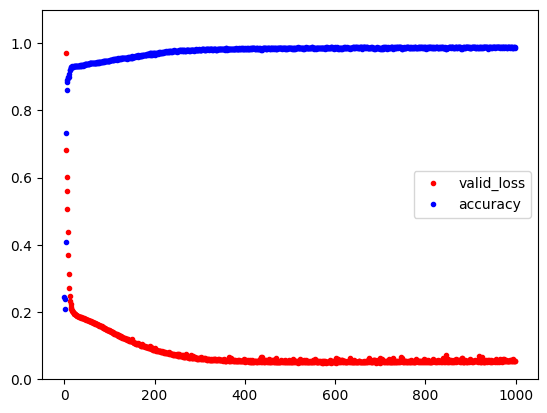

In [14]:
plt.plot(x_len, y_vloss, 'o', c='red', markersize=3, label='valid_loss')
plt.plot(x_len, y_acc, 'o', c='blue', markersize=3, label='accuracy')

plt.legend()
plt.ylim(0, 1.1)

plt.show()

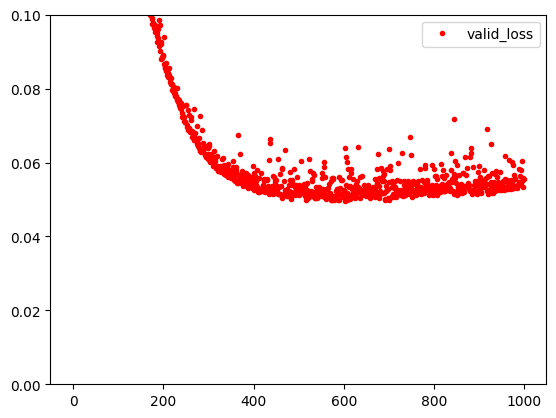

In [15]:
# valid 감소하다가 증가하는 부분(과적합) 확대해보기
x_len = np.arange(len(y_acc))

plt.plot(x_len, y_vloss, 'o', c='red', markersize=3, label='valid_loss')

plt.legend()
plt.ylim(0, 0.1)

plt.show()

In [ ]:
# epoch 500쯤에서 val_loss 값이 최소값을 가짐. 과적합이 일어남
# epoch 500이후부터는 학습의 의미가 없는데 학습을 미리 멈춰도 되지 않을까?
# => earlystopping